In [1]:
import requests
requests.get('https://www.google.com', timeout=10).ok

True

In [2]:
from kaggle_environments import make
env = make('chess', debug=True)

Timeout: 



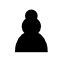
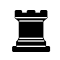
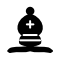
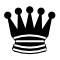
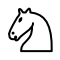
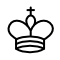
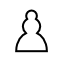
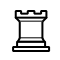
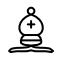
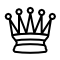
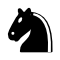
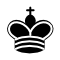

In [66]:
result = env.run(["cfish_link.py", "cfish_link.py"])
env.render(mode="ipython", width=1000, height=1000)

In [23]:
print(result)

[[{'action': '', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 10, 'step': 0, 'board': 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1', 'mark': 'white', 'opponentRemainingOverageTime': 10, 'lastMove': ''}, 'status': 'ACTIVE'}, {'action': '', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 10, 'mark': 'black', 'opponentRemainingOverageTime': 10, 'lastMove': '', 'board': 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'}, 'status': 'INACTIVE'}], [{'action': 'e2e4', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 9.539566, 'step': 1, 'board': 'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e3 0 1', 'mark': 'white', 'opponentRemainingOverageTime': 10, 'lastMove': 'e2e4'}, 'status': 'INACTIVE'}, {'action': '', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 10, 'mark': 'black', 'opponentRemainingOverageTime': 10, 'lastMove': 'e2e4', 'board': 'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e

(50, 2)
[{'action': '', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 10, 'step': 0, 'board': 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1', 'mark': 'white', 'opponentRemainingOverageTime': 10, 'lastMove': ''}, 'status': 'ACTIVE'}, {'action': '', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 10, 'mark': 'black', 'opponentRemainingOverageTime': 10, 'lastMove': '', 'board': 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'}, 'status': 'INACTIVE'}]
[10, 9.539566, 9.131069, 8.723318, 8.318472, 7.912064, 7.504794, 7.099474000000001, 6.692753000000001, 6.290992000000001, 5.883214000000001, 5.4753680000000005, 5.070085000000001, 4.666609, 4.260586, 3.853678, 3.443874, 3.038437, 2.630678, 2.227799, 1.821647, 1.418494, 1.0140219999999998, 0.6044379999999997, 0.20354399999999973]


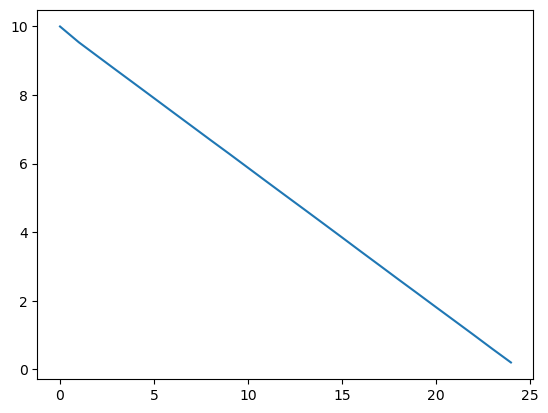

In [65]:
import matplotlib.pyplot as plt
import numpy as np
print(np.shape(result))
print(result[0])
white = result[::2]
whiteTime = [i[0]['observation'].remainingOverageTime for i in white]
plt.plot(whiteTime)
print(whiteTime)


In [64]:
print(result)
black = result[1::2]
blackTime = [i[1]['observation'].remainingOverageTime for i in black]
print(blackTime)

[[{'action': '', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 10, 'step': 0, 'board': 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1', 'mark': 'white', 'opponentRemainingOverageTime': 10, 'lastMove': ''}, 'status': 'ACTIVE'}, {'action': '', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 10, 'mark': 'black', 'opponentRemainingOverageTime': 10, 'lastMove': '', 'board': 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'}, 'status': 'INACTIVE'}], [{'action': 'e2e4', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 9.539566, 'step': 1, 'board': 'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e3 0 1', 'mark': 'white', 'opponentRemainingOverageTime': 10, 'lastMove': 'e2e4'}, 'status': 'INACTIVE'}, {'action': '', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 10, 'mark': 'black', 'opponentRemainingOverageTime': 10, 'lastMove': 'e2e4', 'board': 'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e